# Loan Application Status Prediction

**Problem Statement:**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for model building
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split

#for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking dimensions of the dataset
df.shape

(614, 13)

There are **614** rows and **13** columns including target column.

In [5]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#checking datatypes of the dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.drop('Loan_ID',axis=1, inplace=True)

### Checking NULL values

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see there are Null Values in few columns of our dataset. To fill Null Values of Nominal data such as Gender, Married, Dependents, Self_Employed & Credit_History we will use 'most frequent' strategy and to fill null values of continuous data such as LoanAmount & Loan_Amount_Term we will use mean strategy.

### Replacing Null Values

In [10]:
#Replacing missed values in categorical columns
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

From the above information, we can see that the categorical columns of the dataset are treated. Now we will treat the columns having continuous values.

In [11]:
#Replacing missed values in numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have finally treated all the Null Values found in our data set. Let us again check the number of null values present in our data to verify.

In [13]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

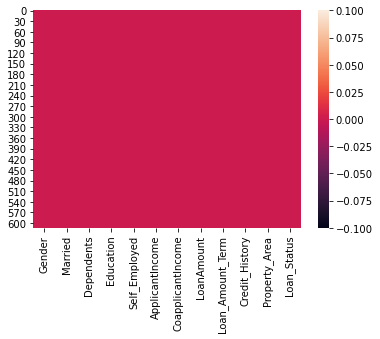

In [14]:
sns.heatmap(df.isnull())

We can see that we have treated all the Null Values in out dataset.

### Uni Variate Analysis

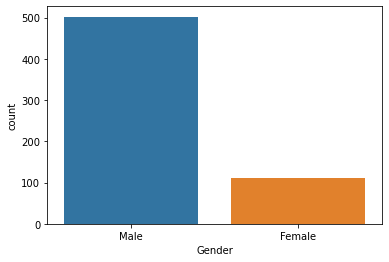

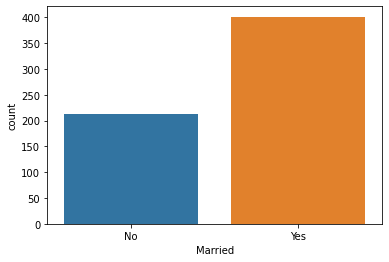

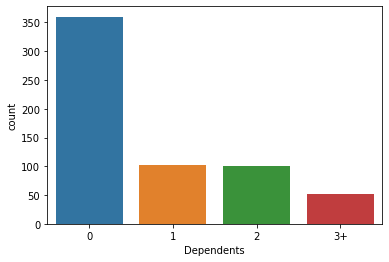

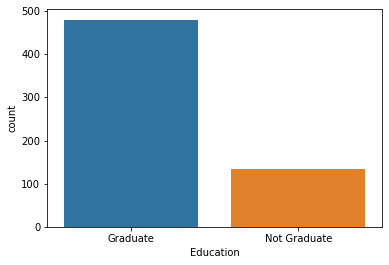

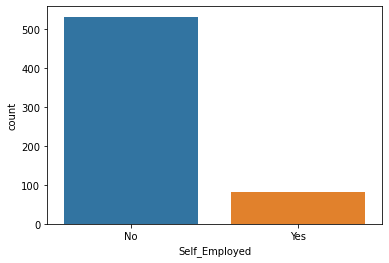

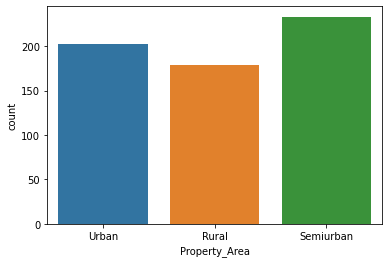

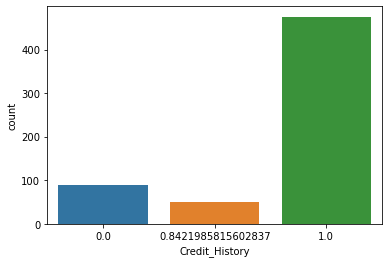

In [15]:
columns=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Credit_History']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.countplot(x=col,data=df)

**Gender:** There are around 500 male applicants and only 112 female applicants applied for Loan.

**Married:** There are around 500 male applicants and only 112 female applicants applied for Loan.

**Dependents:** This column tells us about how many dependents do the loan applicants have. Majority of the people do not have any dependent i.e. 360, 102 have 1 dependent, 101 have 2 dependents, 51 of the more than 3 dependents.

**Education:** Maximum people from the loan application file are Graduated i.e. 480 of them, but 134 are not Graduated.

**Self_Employed:** Hardly few people are Self Employed i.e. 82 people, 532 are not Self Employed and are working under some Organization.

**Property_Area:** Maximum(233) people have a Property Area in a SemiUrban Place. 202 of them own it in Urban Area and 179 own in the Rural Area.

**Credit_History:** 525 people have a Credit History and only 89 of them don't. Majority have a Credit History

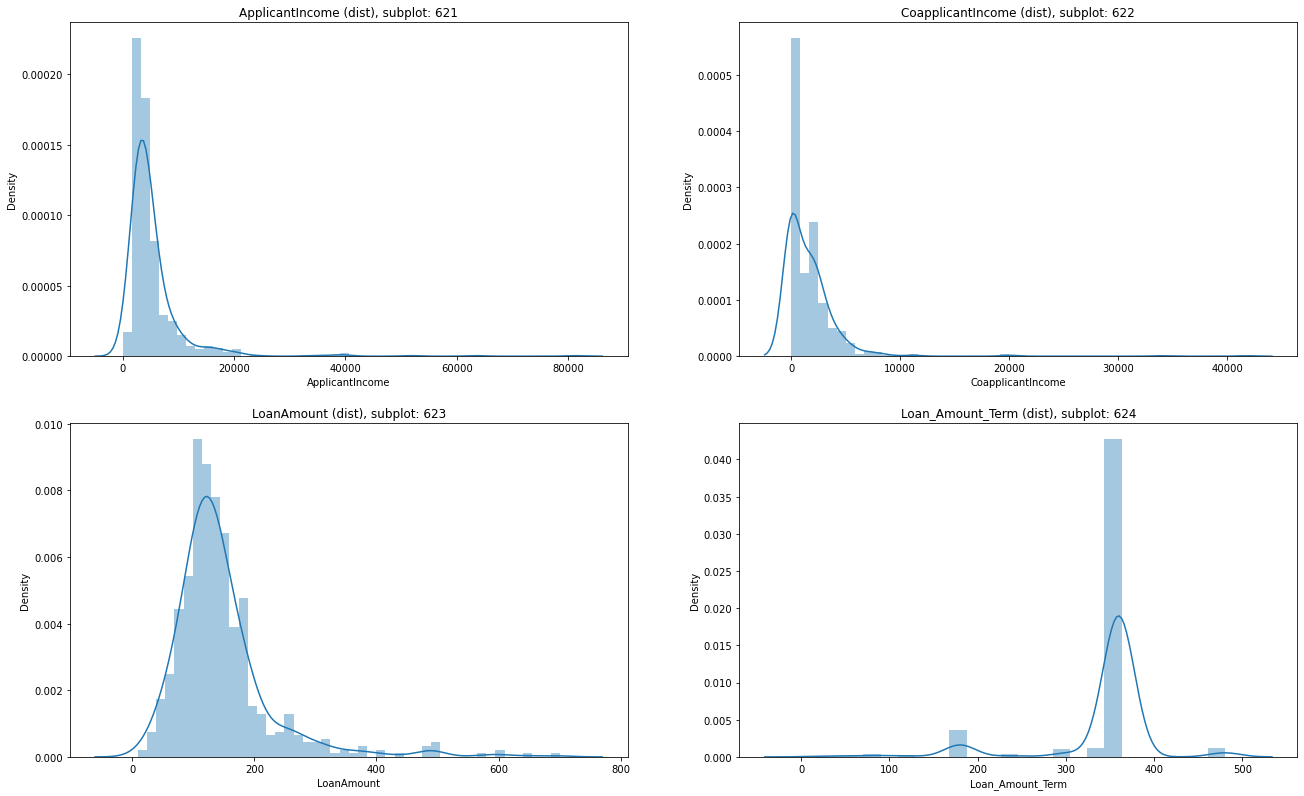

In [16]:
# numerical attributes visualization
columns1=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
#  plot Numerical Data
a = 6  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(22,43))

for i in columns1:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

**ApplicantIncome:** Majority of the people have their income below 20000. Hardly few people earn more than 20000.

**CoapplicantIncome:** Majority of the income of the Co Applicants is below 10000 and hardly few of the Co Applicants have it above 10000.

**LoanAmount:** The Loan Amount given to the people lies between the range 0 and 700. The Loan Amount of Maximum people is between 0 to 200

### Bi-Variate Analysis

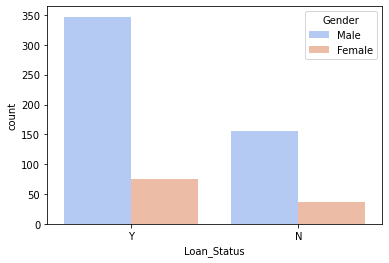

In [17]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Gender', data=df)
plt.show()

In both cases male have higher chance to get the loan and loan  got rejected.

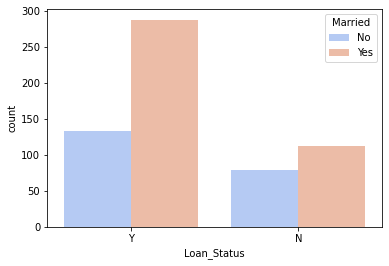

In [18]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Married', data=df)
plt.show()

In both cases mmarried have higher chance to get the loan and loan got rejected.

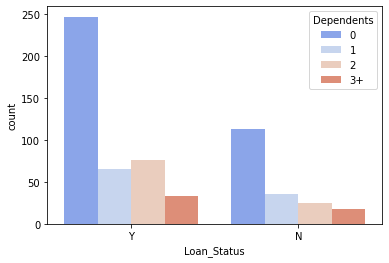

In [19]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Dependents', data=df)
plt.show()

The applicant who have 0 dependents have higher chance to get and loan got rejected.

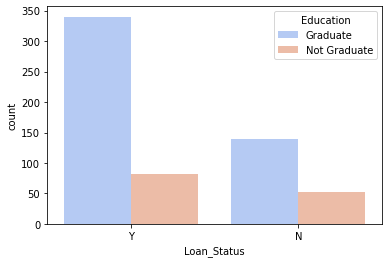

In [20]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Education', data=df)
plt.show()

Most of the Graduated one get loan and also loan got rejected

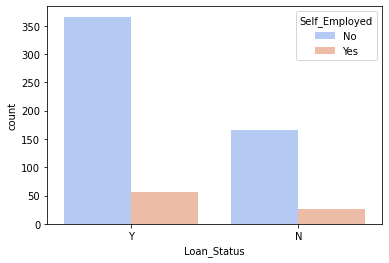

In [21]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Self_Employed', data=df)
plt.show()

Self employed will get loan status approved and also most of them got rejected.

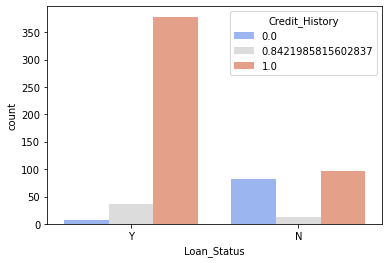

In [22]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Credit_History', data=df)
plt.show()

The applicant having 1 credit history get loan easily.

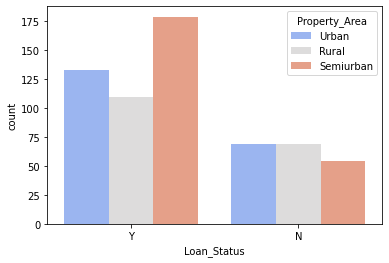

In [23]:
sns.countplot(df['Loan_Status'], palette='coolwarm', hue='Property_Area', data=df)
plt.show()

The property in Semiurban will get will loan easily

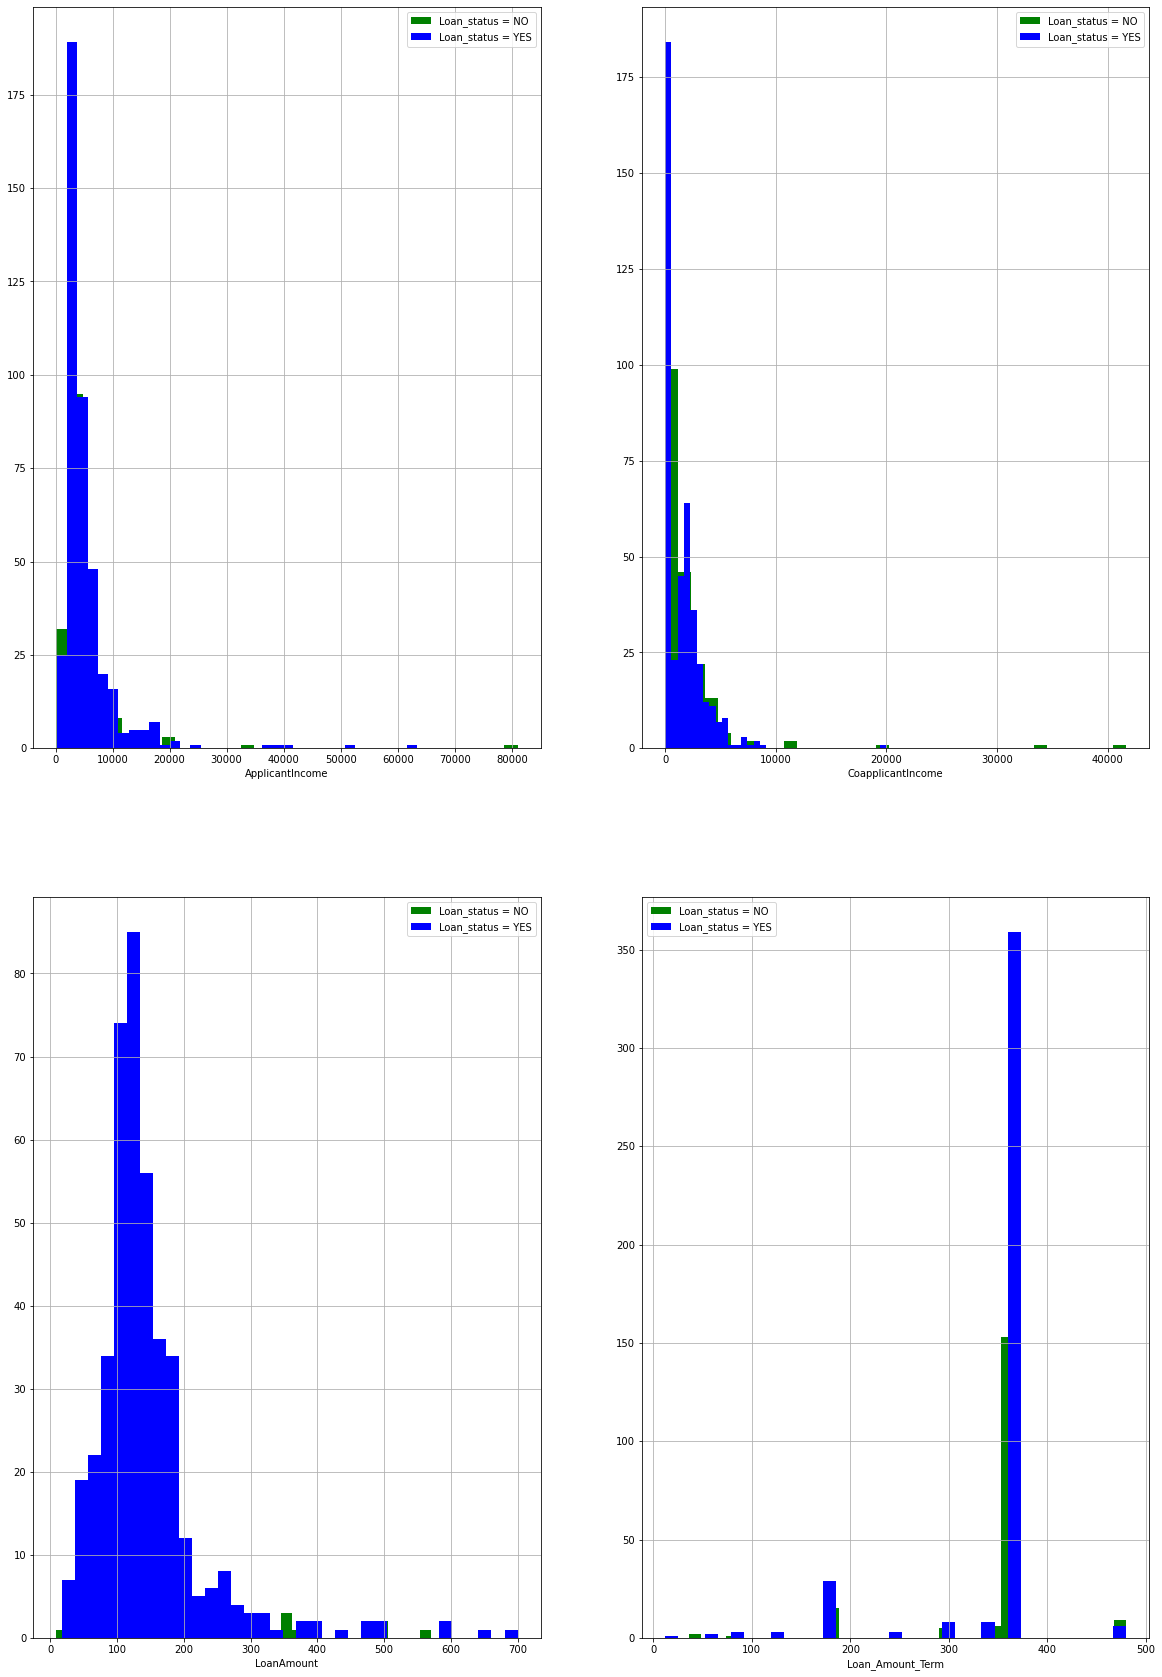

In [57]:
plt.figure(figsize=(20, 30))
cont_columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
for i, column in enumerate(cont_columns, 1):
    plt.subplot(2, 2, i)
    df[df["Loan_Status"] == 0][column].hist(bins=35, color='green', label='Loan_status = NO', alpha=1)
    df[df["Loan_Status"] == 1][column].hist(bins=35, color='blue', label='Loan_status = YES', alpha=1)
    plt.legend()
    plt.xlabel(column)

**ApplicantIncome:** Applicant income around 3000-4000 get loan.

**CoapplicantIncome:** Coapplocant income around 1000 get loan.

**LoanAmount:** Loan amount around 120 can have higher chances to get loan.

**Loan_Amount_Term:** Most of the loan applicants get load if their loan tenure is 360.

### LabelEncoding the Categorical columns

In [25]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [26]:
#Label encoding objects variables
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Loan_Status'] 
label = LabelEncoder()
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Now the categorical object columns had been changed to numerical values.

### Multi-Variate Analysis

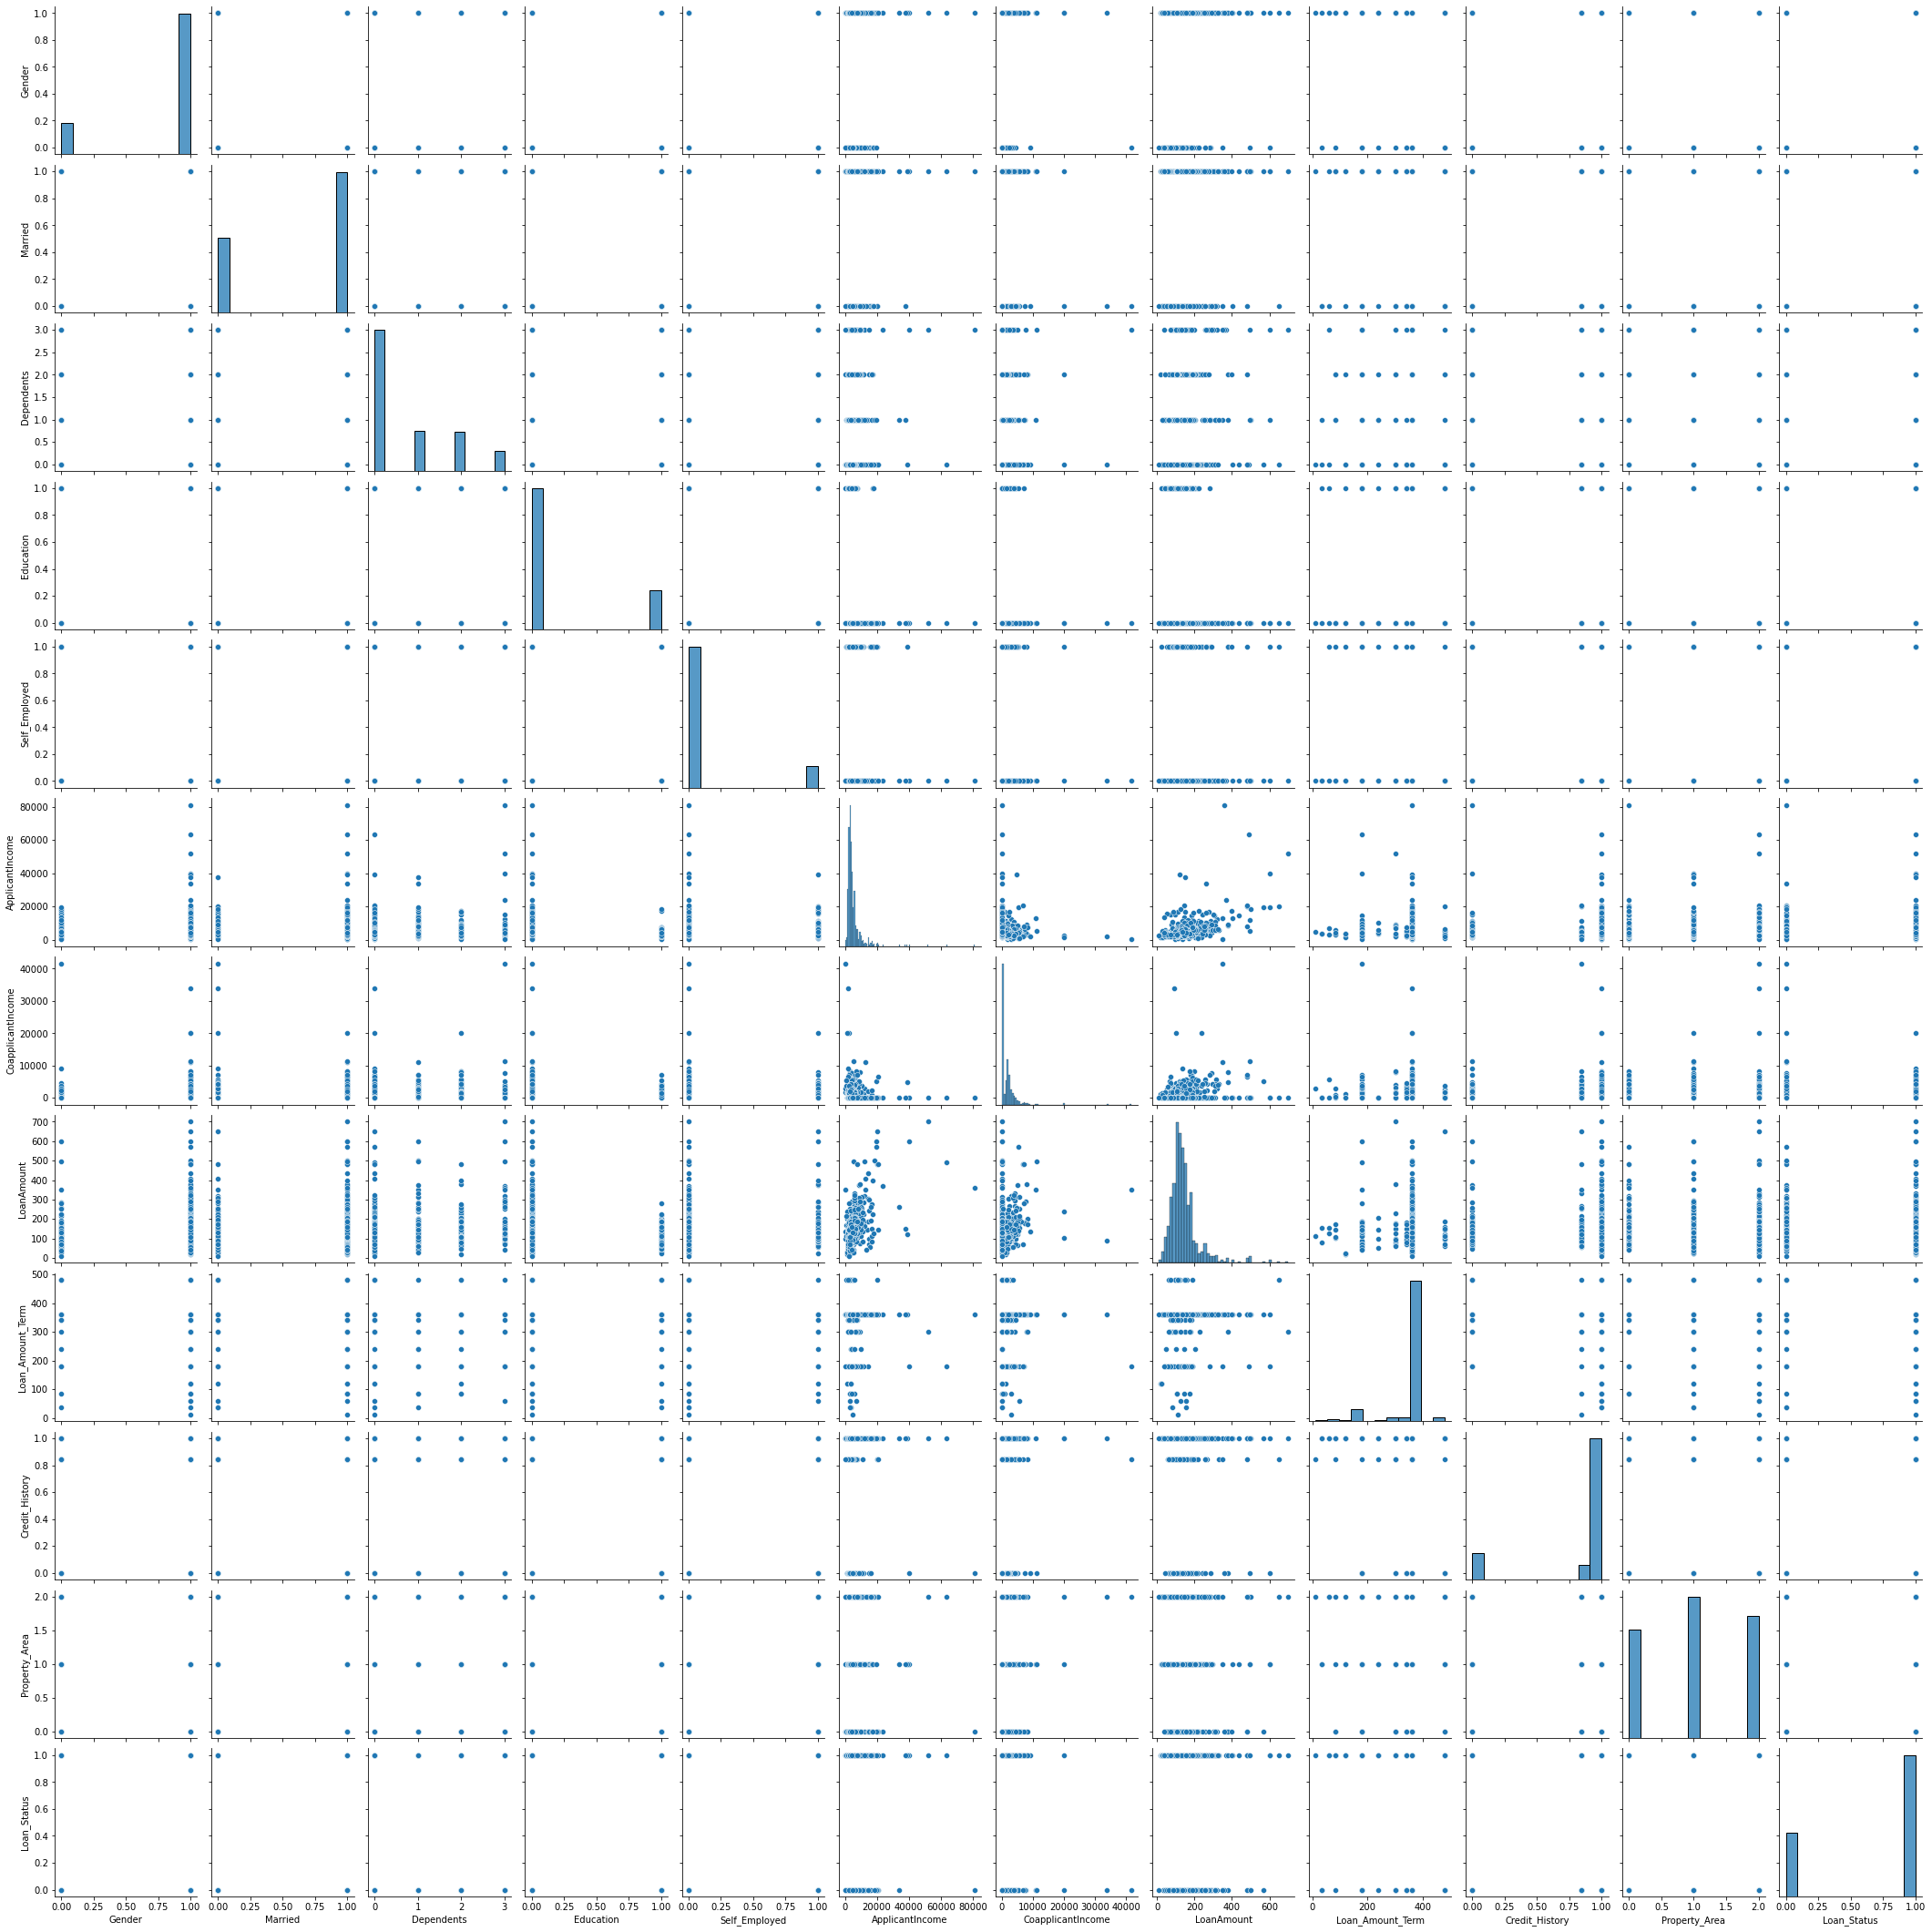

In [27]:
sns.pairplot(df)
plt.show()

In [28]:
#statistical summery
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observation:

We can observe that the standard deviation of initial columns are not huge but the values of columns like ApplicantIncome,CoApplicantIncome and so on is widely Deviated which also shows the possibility of Skewness in Data.

Looking at the min & max values of our dataset, we can also see the possibility of having outliers in our data.

### Checking Correlation

In [29]:
#Let's check the correlation
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


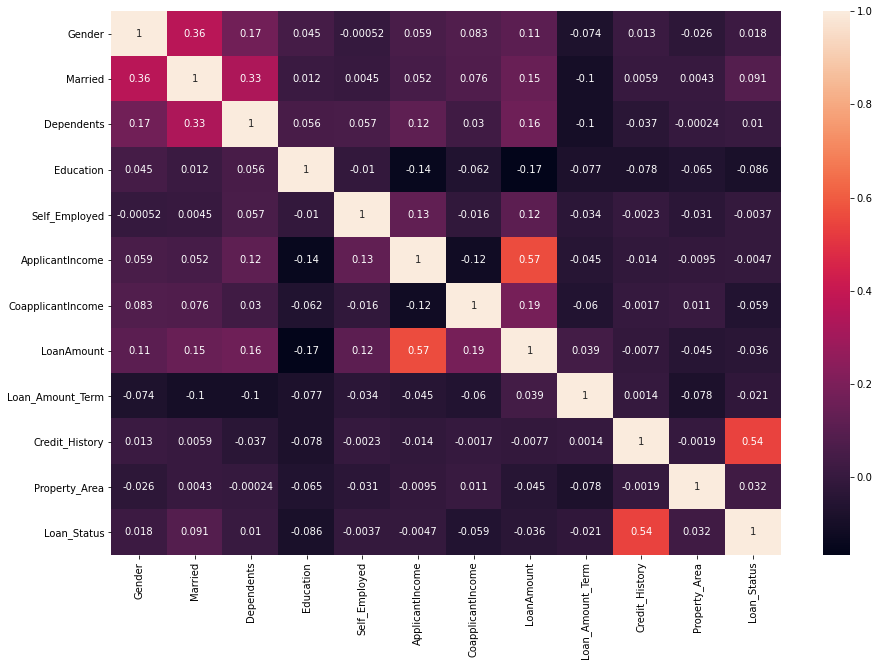

In [30]:
#Heatmap for correlation
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations:

The most positively correlated variable with the target variable is the Credit History.

The most negatively correlated variable with the target variable is Education.

We can see that Self Employed and Applicant's Income does not show much correlation with the Target Variable.

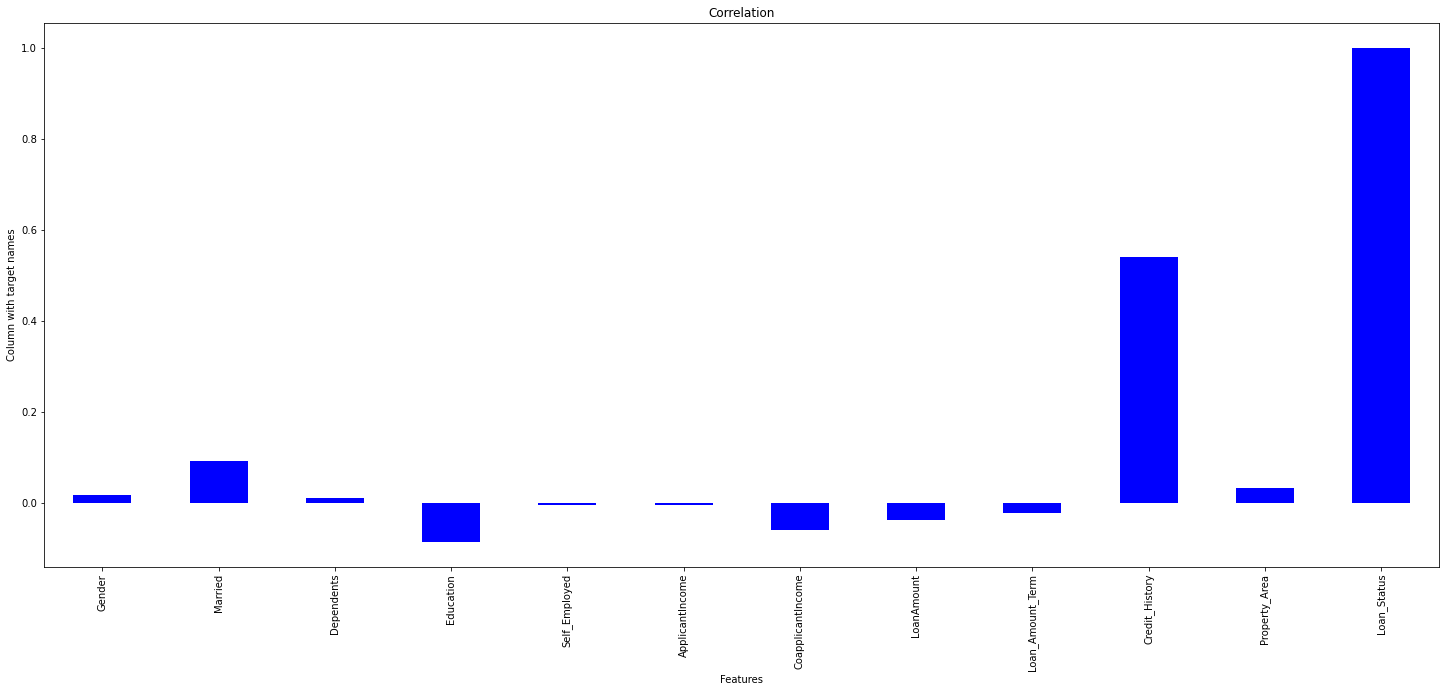

In [31]:
#barplot for correlation
plt.figure(figsize = (25, 10))
df.corr()['Loan_Status'].plot(kind = 'bar', color = 'b')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

The positively correlated columns with the Target Variable are Credit History, Married, Property Area, Gender & Dependents.

### Checking Outliers using Boxplot

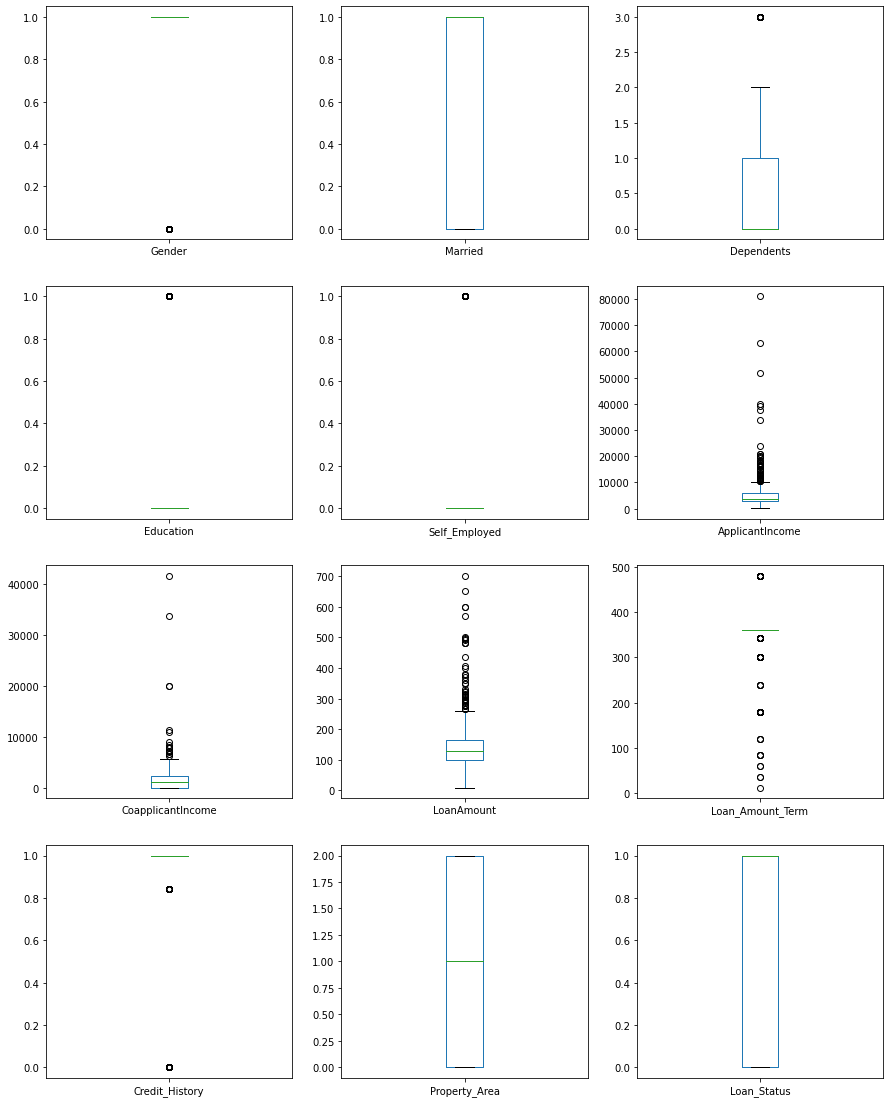

In [32]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(6,3),figsize=(15,30))
plt.show()

We can see a few outliers in our continuous type of variables. Hence, we will resolve these outliers.

### Removing Outliers

In [33]:
# z score technique
from scipy.stats import zscore
z=np.abs(zscore(df))

In [34]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [35]:
loss_percent=((614-577)/614)*100
loss_percent

6.026058631921824

We can observe that there are too many outliers present in the majority of our columns. So we remove Outliers and create model.

### Checking Skewness

In [36]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

We found skewness and lets remove skewness after splitting data.

### Splitting Independent(x) and Target(y) variables.

In [37]:
# specify input and output attributes
x = df_new.drop(columns=['Loan_Status'], axis=1)
y = df_new['Loan_Status']

In [38]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

Skewness has been removed

In [39]:
#importing library for scaling
from sklearn.preprocessing import StandardScaler
#Scaling our data to improve model performance
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [40]:
#checking shape of x and y
print(x.shape)
print(y.shape)

(577, 11)
(577,)


### Checking Best Random State

In [41]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

Best accuracy is 0.867816091954023 n Random_state 12


We have found best random_state value as 12. We will create our train_test_split using random_state(12).

## Creating Model

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=12)

In [43]:
models=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier()]


for model in range(len(models)):
    mod=models[model]
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(models[model],"accuracy_score", accuracy_score(y_test,pred))
    

LogisticRegression() accuracy_score 0.867816091954023
SVC() accuracy_score 0.8908045977011494
GaussianNB() accuracy_score 0.8218390804597702
DecisionTreeClassifier() accuracy_score 0.735632183908046
KNeighborsClassifier() accuracy_score 0.8333333333333334
RandomForestClassifier() accuracy_score 0.8448275862068966
AdaBoostClassifier() accuracy_score 0.8218390804597702
GradientBoostingClassifier() accuracy_score 0.8333333333333334


Here we observe that **SVC** has best Accuracy compared to other models. Lets check cross validation score for best fit model.

### Checking Cross Validation score

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
for model in range(len(models)):
    scr=cross_val_score(models[model],x,y,cv=5)
    print("Cross Validation Score for",models[model],scr.mean())

Cross Validation Score for LogisticRegression() 0.7920689655172414
Cross Validation Score for SVC() 0.8111244377811093
Cross Validation Score for GaussianNB() 0.7747226386806597
Cross Validation Score for DecisionTreeClassifier() 0.6915742128935533
Cross Validation Score for KNeighborsClassifier() 0.7730134932533733
Cross Validation Score for RandomForestClassifier() 0.7955172413793103
Cross Validation Score for AdaBoostClassifier() 0.7938380809595202
Cross Validation Score for GradientBoostingClassifier() 0.7886656671664167


The difference between the accuracy score and cv score of Decision Tree Classifier is 1.

Hence, **DecisionTreeClassifier** is giving us better accuracy than other models. So we proceed using Decision Tree for our project.

### Hyper Tuning the Model

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

In [47]:
#creating parameter list to pass in GridSearchCV

DTC_parameters={'max_depth':np.arange(2,15),
               'criterion':['gini','entropy'],
               'splitter':['best','random']}

DTC=GridSearchCV(DecisionTreeClassifier(),DTC_parameters,cv=5)

DTC.fit(x_train,y_train)

DTC.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [48]:
DTC_model=DecisionTreeClassifier(criterion= 'gini', max_depth= 2,splitter='random')
DTC_model.fit(x_train,y_train)

pred=DTC_model.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

88.50574712643679
[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



After hyper Tuning the DecisionTreeClassifier accuracy had improved to 88.5%.

### AUC ROC curve for DecisionTreeClassifier

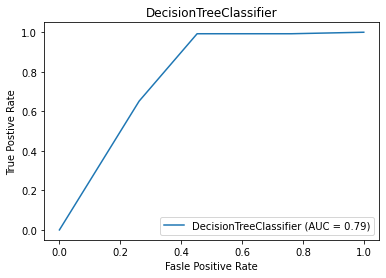

In [49]:
plot_roc_curve(DTC_model,x_test,y_test)
plt.title("DecisionTreeClassifier")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

In [50]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)  
Acc=accuracy_score(y_test,pre)
recall = recall_score(y_test,pre, average='binary')
precision = precision_score(y_test,pre, average='binary')
f1 = f1_score(y_test, pre)

results = pd.DataFrame([['AdaBoostClassifier', Acc, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

DecisionTreeClassifier()


,Model,Accuracy,Precision,Recall,F1 Score
0,AdaBoostClassifier,0.729885,0.882883,0.742424,0.806584


### Saving the Model

In [51]:
import pickle
filename = 'Loan_application.pkl'
pickle.dump(DTC_model,open(filename,'wb'))

### Conclusion

In [52]:
Final=np.array(y_test)
Final

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [53]:
predict=np.array(DTC_model.predict(x_test))

In [54]:
df_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))

In [55]:
df_pred

,original,predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
169,1,1
170,1,1
171,0,1
172,1,1
